In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import (gkey)
import gmaps

In [2]:
data = "cleaned_data.csv"

In [3]:
merged_df = pd.read_csv(data, index_col = False)
merged_df.head()

,Unnamed: 0,id,neighbourhood_cleansed,room_type,zipcode,latitude,longitude,property_type,price,number_of_reviews,review_scores_rating,reviews_per_month,square_feet,potential_annual_revenue,Zillow_Avg_Value,yield,rent_squre_foot
0,0,9448215,Minor,Private room,98122.0,47.611079,-122.312820,House,67.0,1,100.0,1.00,0.0,8070.15,778900.0,1.036096,0.0
1,1,7204672,Lawton Park,Entire home/apt,98199.0,47.659470,-122.401873,House,200.0,2,90.0,0.43,0.0,24090.00,917500.0,2.625613,0.0
2,2,5579427,Lawton Park,Entire home/apt,98199.0,47.654211,-122.408389,House,229.0,4,100.0,0.74,0.0,27583.05,917500.0,3.006327,0.0
3,3,6734621,Lawton Park,Entire home/apt,98199.0,47.651031,-122.385004,Townhouse,333.0,29,94.0,4.24,0.0,40109.85,917500.0,4.371646,0.0
4,4,2263643,Lawton Park,Private room,98199.0,47.659121,-122.402265,Apartment,41.0,57,89.0,3.01,0.0,4938.45,917500.0,0.538251,0.0


In [4]:
zipcode = merged_df["zipcode"]
zipcode.head()

0    98122.0
1    98199.0
2    98199.0
3    98199.0
4    98199.0
Name: zipcode, dtype: float64

In [5]:
reviews = merged_df["number_of_reviews"]
reviews.head()

0     1
1     2
2     4
3    29
4    57
Name: number_of_reviews, dtype: int64

In [6]:
square_feet= merged_df["square_feet"]
square_feet.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: square_feet, dtype: float64

In [7]:
potential_annual_revenue = merged_df["potential_annual_revenue"]
potential_annual_revenue.head()

0     8070.15
1    24090.00
2    27583.05
3    40109.85
4     4938.45
Name: potential_annual_revenue, dtype: float64

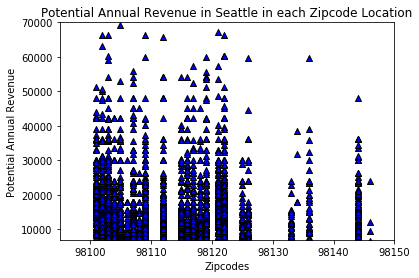

In [22]:
plt.scatter(zipcode,potential_annual_revenue,marker="^", facecolors="blue",
           edgecolors="black")
plt.title("Potential Annual Revenue in Seattle in each Zipcode Location")
plt.xlabel("Zipcodes")
plt.ylabel("Potential Annual Revenue")
plt.xlim(98095,98150)
plt.ylim(7000, 70000)
plt.show()

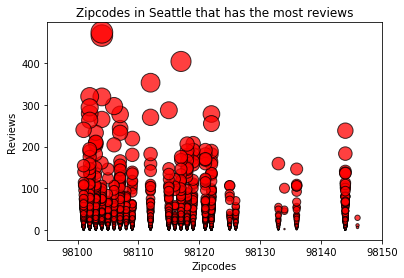

In [21]:
plt.scatter(zipcode,reviews,marker="o", facecolors="red",
           edgecolors="black",s=reviews,alpha=0.75)
plt.title("Zipcodes in Seattle that has the most reviews")
plt.xlabel("Zipcodes")
plt.ylabel("Reviews")
plt.xlim(98095,98150)
plt.savefig("Reviews Vs Zipcode.png")
plt.show()

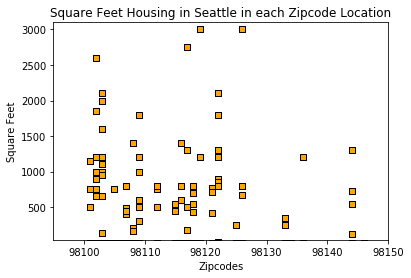

In [20]:
plt.scatter(zipcode,square_feet,marker="s", facecolors="orange",
           edgecolors="black",alpha=1)
plt.title("Square Feet Housing in Seattle in each Zipcode Location")
plt.xlabel("Zipcodes")
plt.ylabel("Square Feet")
plt.xlim(98095,98150)
plt.ylim(40, 3100)
plt.savefig("Square Feet Housing.png")
plt.show()

In [11]:
neighbourhood_cleansed= pd.DataFrame(merged_df["neighbourhood_cleansed"].value_counts()).reset_index()
neighbourhood_cleansed.head()

,index,neighbourhood_cleansed
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,135


In [12]:
neighbourhood = neighbourhood_cleansed.loc[neighbourhood_cleansed.index <= 7, :]
neighbourhood.head()

,index,neighbourhood_cleansed
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,135


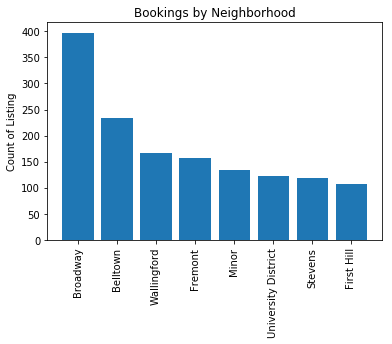

In [13]:
plt.bar(neighbourhood["index"], neighbourhood["neighbourhood_cleansed"])
plt.xticks(neighbourhood["index"], rotation="vertical")
plt.ylabel('Count of Listing')
plt.title('Bookings by Neighborhood')
plt.savefig("Bookings by Neighborhood.png")

In [14]:
cleansed=list(neighbourhood['neighbourhood_cleansed'])
property_type=list(neighbourhood['index'])

property_type

['Broadway',
 'Belltown',
 'Wallingford',
 'Fremont',
 'Minor',
 'University District',
 'Stevens',
 'First Hill']

In [15]:
mean_prices = merged_df.groupby(['neighbourhood_cleansed'])[["price"]].mean()
mean_prices.head()

,price
neighbourhood_cleansed,
Adams,121.671429
Alki,171.619048
Arbor Heights,126.800000
Atlantic,111.396226
Belltown,162.893162


In [16]:
mean_prices = merged_df.groupby(['property_type'])[["price"]].mean()
mean_prices=mean_prices.reset_index()

price_list=list(mean_prices['price'])
property_type=list(mean_prices['property_type'])

property_type

['0',
 'Apartment',
 'Bed & Breakfast',
 'Boat',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Chalet',
 'Condominium',
 'Dorm',
 'House',
 'Loft',
 'Other',
 'Tent',
 'Townhouse',
 'Treehouse',
 'Yurt']

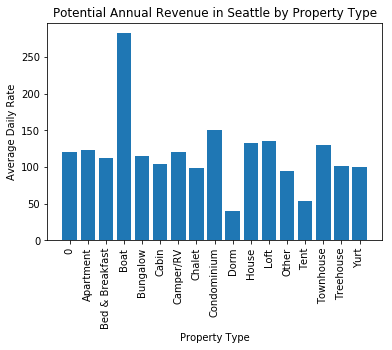

In [17]:
x_axis = np.arange(len(price_list))

plt.bar(property_type, price_list)
plt.xticks(rotation=90)
plt.title("Potential Annual Revenue in Seattle by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Daily Rate")
plt.savefig("Revenue_Property_Price.png")

In [18]:
locations = merged_df[["latitude", "longitude"]].astype(float)
rental_yield = merged_df["yield"].astype(float)

In [19]:
fig = gmaps.figure()

#Instead of markers layer which puts the pins, here we are doing a heatmap layer
heat_layer = gmaps.heatmap_layer(locations,weights=rental_yield,
                                dissipating=False, max_intensity=1000,
                                point_radius = 0.02)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 1000
heat_layer.point_radius = 0.02


fig.add_layer(heat_layer)

fig
#need to save image once we get this to run

Figure(layout=FigureLayout(height='420px'))